# **SALES DEVELOPMENT REPRESENTATIVE PROJECT USING OPENAI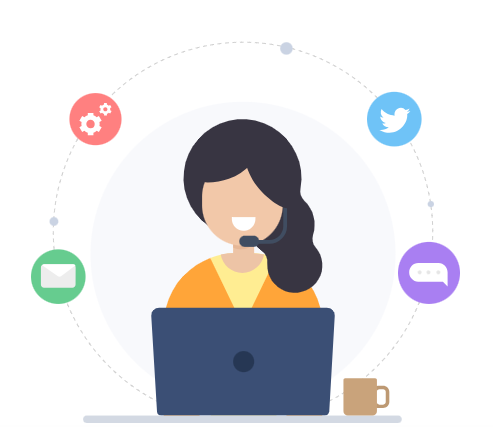**

**INTRODUCTION:**

I developed an OpenAI-powered language model to retrieve data from a sales dataset and automatically generate an email using a lead's first and last name.

**Challenge:**  
Since the dataset lacked dedicated columns for first and last names, I filtered leads based on those with either a name or email address. Additionally, I identified patterns within company names to link user queries to leads by their names.

**Project Breakdown:**

**Section 1: Data Preparation and Preprocessing**
- Downloaded two sales datasets from Kaggle.
- Merged them on a shared column.
- Filtered leads where the company field contained either a name or email address.
- Shifted the company column to the fourth position for easier analysis.
- Removed empty columns and saved the dataset as a CSV file.

**Section 2: Developing an OpenAI LLM with Retrieval-Augmented Generation (RAG)**
- Generated an OpenAI API key.
- Built a function to query data and generate automated emails:
  - Given a query (e.g., "Company name contains 'Bank'"), the model creates a DataFrame listing relevant companies, along with fields like 'Prospect ID', 'Company', 'Lead Origin', and 'Lead Source'. This data is automatically saved as a CSV (optionally adjustable in code).
  - To generate the email content, I used OpenAI’s "gpt-3.5-turbo" model with RAG to include additional dataset information for more informative and structured emails.

**Section 3: OpenAI Chatbot for Automated Actions Based on User Queries**
- Developed a chatbot that performs the tasks above in response to user input.

**Section 4: OpenAI Agent in OpenAI_SDR_APP(Part2).ipynb**
- Created an OpenAI agent to assist users:
  - Initially tested the model’s ability to retrieve information (e.g., a client's email) without calling specific functions.
  - Built a query structure to prompt the agent to fetch data and generate either a DataFrame or custom marketing email.

**Observations:**  
The agent functions similarly to the LLM created earlier, though it doesn’t create DataFrames or CSV files. Developing this feature in the assistant section presented some challenges. I am currently working on improving this aspect.

**Future Improvements:**  
Future Improvements:
The agent performs well, though response times on the API platform are longer than expected. Deployment was error-free, but I am investigating the delay to optimize performance. Additionally, the slower response times may be related to the free or lower-tier API version in use, which may lack priority in processing requests. Upgrading to a paid tier could potentially enhance response speed and overall performance consistency. [Unofficial Refrence](https://openai-status.llm-utils.org/)

# **SECTION 1: Data Preparation & Prepocessing:**

In [59]:
!pip install -q kaggle  #installing kaggkle api to download the datasets in the given homework instruction

In [60]:
from google.colab import files
files.upload()                 #uploading the kaggle API Key from your local machine

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"saharujan","key":"43385f4bfa36fbc035bdd8b2f49d8859"}'}

**#Make sure to put the API key in the folowing path**

In [61]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [62]:
!cp kaggle.json ~/.kaggle/

In [63]:
!chmod 600 ~/.kaggle/kaggle.json

## **Downloading and Loading Datasets**

In [64]:
import pandas as pd
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

In [65]:
# Define the datasets and paths
dataset1 = "rockbottom73/leads-dataset"
dataset2 = "ashydv/leads-dataset"
download_path = "/content/datasets"

In [66]:
# Create a directory to store the downloaded datasets
os.makedirs(download_path, exist_ok=True)

# Download the datasets
print("Downloading datasets...")
api.dataset_download_files(dataset1, path=download_path, unzip=True)
api.dataset_download_files(dataset2, path=download_path, unzip=True)



Dataset URL: https://www.kaggle.com/datasets/rockbottom73/leads-dataset
Dataset URL: https://www.kaggle.com/datasets/ashydv/leads-dataset


In [67]:

# Load the datasets
# Replace with actual filenames found after download and extraction
leads_df1 = pd.read_csv(os.path.join(download_path, 'Leads.csv'))  # Or 'rockbottom73/leads.csv'
# Try different encodings like 'latin-1', 'cp1252', 'iso-8859-1', etc.
leads_df2 = pd.read_csv(os.path.join(download_path, 'SampleData.csv'), encoding='latin-1') # Added encoding parameter

<ipython-input-67-0ccda4658194>:5: DtypeWarning: Columns (5,44,53,77,97) have mixed types. Specify dtype option on import or set low_memory=False.
  leads_df2 = pd.read_csv(os.path.join(download_path, 'SampleData.csv'), encoding='latin-1') # Added encoding parameter


**Just checking the common and uncommon columns between the two datasets**

In [68]:
# Get column names
column_names =leads_df2.columns

# Print column names
print("Column names:", column_names)

Column names: Index(['Prospect ID', 'Lead Number', 'Company', 'Lead Origin', 'Mobile Number',
       'Website', 'Time Zone', 'Job Title', 'Lead Source', 'Source Medium',
       ...
       'Stage Rotting Flag Level', 'Mailing Preferences', 'Twitter Id',
       'Facebook Id', 'LinkedIn Id', 'Skype Id', 'Gtalk Id', 'Google Plus Id',
       'Quality Score 01', 'Groups'],
      dtype='object', length=122)


In [69]:
# Get the shape of the DataFrame
rows, columns = leads_df1.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 9240
Number of columns: 37


In [70]:
# Get the column names from both datasets
columns_df1 = set(leads_df1.columns)
columns_df2 = set(leads_df2.columns)

# Find common columns
common_columns = columns_df1.intersection(columns_df2)

# Convert the result to a list (optional)
common_columns_list = list(common_columns)

# Print the common columns
print("Common columns:", common_columns_list)

Common columns: ['Do Not Call', 'Search', 'Lead Origin', 'Tags', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'Lead Profile', 'Lead Source', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Specialization', 'What is your current occupation', 'Newspaper', 'Magazine', 'Country', 'Newspaper Article', 'Do Not Email', 'TotalVisits', 'Prospect ID', 'Digital Advertisement', 'Receive More Updates About Our Courses', 'Last Activity', 'Lead Quality', 'Lead Number', 'Through Recommendations', 'Last Notable Activity', 'Page Views Per Visit', 'Update me on Supply Chain Content', 'Asymmetrique Profile Score']


In [71]:
# Find uncommon columns
uncommon_in_df1 = columns_df1 - columns_df2  # Columns in df1 but not in df2
uncommon_in_df2 = columns_df2 - columns_df1  # Columns in df2 but not in df1

# Convert results to lists (optional)
uncommon_in_df1_list = list(uncommon_in_df1)
uncommon_in_df2_list = list(uncommon_in_df2)

# Print the uncommon columns
print("Columns in dataset 1 but not in dataset 2:", uncommon_in_df1_list)
print("Columns in dataset 2 but not in dataset 1:", uncommon_in_df2_list)

Columns in dataset 1 but not in dataset 2: ['Get updates on DM Content', 'Converted', 'How did you hear about X Education', 'City', 'X Education Forums', 'Total Time Spent on Website', 'What matters most to you in choosing a course', 'A free copy of Mastering The Interview']
Columns in dataset 2 but not in dataset 1: ['Twitter URL', 'Admission Number', 'Stage Rotting Flag Message', 'Admission Date', 'Industry', 'Gtalk Id', 'Stage Rotting Flag Level', 'What attracted you to consider SomeSchool ', 'Lead Conversion Date', 'Profile Score', 'Photo Url', 'Landing Page', 'Asymm Are you applying for any other form of MBA', 'Previous Stage', 'Country New', 'Zip', 'Stage Rotting Flag Status', 'Source Content', 'Source Medium', 'Last Activity Date', 'ecode', 'Address 2', 'Source Referrer', 'Asym preferences for selecting management course', 'Mobile Number', 'Time Zone', 'Job Title', 'Asym How do you feel about taking admission', 'Google Plus Id', 'Notes', 'Created On', 'Website', 'Mailing Prefere

# **Merging the two datasets**

In [72]:
# Merge datasets on different column names
merged_data = pd.merge(leads_df1, leads_df2, on='Lead Number', how='inner', suffixes=('', '_dup'))


In [73]:
merged_data.shape

(9240, 158)

**Data Pre-Processing**

In [74]:
# Identify duplicated columns created during the merge
duplicated_columns = [col for col in merged_data.columns if col.endswith('_dup')]

# Print the count and names of duplicated columns
print(f"Number of duplicated columns: {len(duplicated_columns)}")
if duplicated_columns:
    print("Duplicated columns:", duplicated_columns)

Number of duplicated columns: 28
Duplicated columns: ['Prospect ID_dup', 'Lead Origin_dup', 'Lead Source_dup', 'Do Not Email_dup', 'Do Not Call_dup', 'TotalVisits_dup', 'Page Views Per Visit_dup', 'Last Activity_dup', 'Country_dup', 'Specialization_dup', 'What is your current occupation_dup', 'Search_dup', 'Magazine_dup', 'Newspaper Article_dup', 'Newspaper_dup', 'Digital Advertisement_dup', 'Through Recommendations_dup', 'Receive More Updates About Our Courses_dup', 'Tags_dup', 'Lead Quality_dup', 'Update me on Supply Chain Content_dup', 'Lead Profile_dup', 'Asymmetrique Activity Index_dup', 'Asymmetrique Profile Index_dup', 'Asymmetrique Activity Score_dup', 'Asymmetrique Profile Score_dup', 'I agree to pay the amount through cheque_dup', 'Last Notable Activity_dup']


In [75]:
# Remove duplicated columns that have '_dup' suffix
merged_data = merged_data.loc[:, ~merged_data.columns.str.endswith('_dup')]

In [76]:
#size of merged data
merged_data.shape

(9240, 130)

In [77]:
#extract company names column

# Find columns that contain the keyword 'company'
company_columns = [col for col in merged_data.columns if 'company' in col.lower()]

In [78]:
# Display the columns that match the keyword
print("\nColumns containing 'company':")
print(company_columns)


Columns containing 'company':
['Company']


In [79]:
#Put Company column to the 4th column
# Move 'Company' column to the 4th position
columns = list(merged_data.columns)  # Get all columns as a list
columns.insert(3, columns.pop(columns.index('Company')))

In [80]:
# Reorder the DataFrame with 'Company' in the 4th position
merged_data = merged_data[columns]
merged_data.head()

,Prospect ID,Lead Number,Lead Origin,Company,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,...,Stage Rotting Flag Level,Mailing Preferences,Twitter Id,Facebook Id,LinkedIn Id,Skype Id,Gtalk Id,Google Plus Id,Quality Score 01,Groups
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,NaN,Olark Chat,No,No,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,NaN,Organic Search,No,No,0,5.0,674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,NaN,Direct Traffic,No,No,1,2.0,1532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,NaN,Direct Traffic,No,No,0,1.0,305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,NaN,Google,No,No,1,2.0,1428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#copy merged data
mdata = merged_data.copy()

In [82]:
#filtered data includes leads with Lead Origin: Landing Page Submission and Company is either alphabet or email address
filtered_df = mdata[
    (merged_data['Lead Origin'] == 'Landing Page Submission') &  # Condition for Lead Origin
    (merged_data['Company'].notnull()) &  # Exclude null values in Company
    (merged_data['Company'] != "N.A.") &
    (merged_data['Company'].astype(str).str.contains(r'\d') == False)]  # Exclude entries containing digits


filtered_df.reset_index(drop=True, inplace=True)

In [83]:
filtered_df.shape

(61, 130)

In [84]:
# Remove columns with no values (entirely NaN or empty)
empty_columns = filtered_df.columns[filtered_df.isna().all() | (filtered_df== '').all()]
filtered_df= filtered_df.drop(columns=empty_columns)

# Print the count and names of empty columns
print(f"Number of empty columns removed: {len(empty_columns)}")
if empty_columns.any():
    print("Empty columns removed:", list(empty_columns))

Number of empty columns removed: 40
Empty columns removed: ['Mobile Number', 'Time Zone', 'Job Title', 'Order Value', 'Address 1', 'Address 2', 'Zip', 'Facebook URL', 'Twitter URL', 'LinkedIn URL', 'Industry', 'Work Area', 'Course Interested', 'Keyword', 'Date', 'Next Follow Up', 'Chat Group', 'ecode', 'amt', 'eventname', 'Enquiry Type', 'What attracted you to consider SomeSchool ', 'Landing Page', 'Lead Type', 'Source Referrer', 'Photo Url', 'Stage Rotting Flag Status', 'Stage Rotting Flag Message', 'Stage Rotting Flag Modification Date', 'Stage Rotting Flag Additional Info', 'Stage Rotting Flag Level', 'Mailing Preferences', 'Twitter Id', 'Facebook Id', 'LinkedIn Id', 'Skype Id', 'Gtalk Id', 'Google Plus Id', 'Quality Score 01', 'Groups']


In [85]:
filtered_df.shape

(61, 90)

In [86]:
#save filtered data as csv
filtered_df.to_csv('filtered_data.csv', index=False)

# **SECTION 2: Open AI LLM**

## **Setting Up open ai API key**

In [87]:
import openai
from openai import OpenAI

In [91]:
#upload csv file
data = pd.read_csv('filtered_data.csv')

In [92]:
!pip install tabulate


# **Creating RAG-LLM Function**

In [93]:
import os
import pandas as pd
import openai
from tabulate import tabulate

# Set up OpenAI API key

# Ensure OpenAI API key is set in the environment
openai.api_key = os.getenv("OPENAI_API_KEY")
def sdr_assistant_rag(first_name=None, last_name=None, product_name=None, query=None):
    if query:
        # Query mode: Find people based on company patterns
        results = data[data['Company'].str.contains(query, case=False, na=False)]
        if not results.empty:
            display_columns = ['Prospect ID', 'Company', 'Lead Origin', 'Lead Source']
            results_display = results[display_columns]

            # Print the DataFrame in a neatly formatted table
            print("Query Results:")
            print(tabulate(results_display, headers="keys", tablefmt="grid"))

            # Generate and save the CSV file
            output_file_path = "./query_results.csv"
            results_display.to_csv(output_file_path, index=False)
            print(f"\nCSV file has been generated and saved at: {output_file_path}")

            return output_file_path
        else:
            print("No matching records found for the query.")
            return "No matching records found for the query."

    elif first_name and last_name and product_name:
        # Sales email generation mode
        potential_matches = data[data['Company'].str.contains(first_name, case=False, na=False) |
                                 data['Company'].str.contains(last_name, case=False, na=False)]
        if not potential_matches.empty:
            # Retrieve context from the first matched entry
            contact_info = potential_matches.iloc[0]
            company = contact_info['Company']
            lead_origin = contact_info.get('Lead Origin', 'N/A')
            lead_source = contact_info.get('Lead Source', 'N/A')

            # Define the prompt for generating the sales email
            prompt = (f"Your name is Sahar, and write a personalized sales email to {first_name} {last_name} at {company}. "
                      f"Introduce our product, {product_name}, emphasizing benefits relevant to a company that came through "
                      f"{lead_origin} as the origin and {lead_source} as the source. Describe how our product can support "
                      "their business goals and solve common pain points in their industry.")

            # Generate Email Content using OpenAI's API
            client = openai.OpenAI()
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=250
            )

            email_content = response.choices[0].message.content.strip()  # Accessing the message content
            return email_content
        else:
            return "No matching contact found in the database."


**Using a query to retrieve a list of data and generating the output in csv format as well**

In [94]:
# Example usage of Query-Based Extraction
# Find people who work at universities
university_contacts = sdr_assistant_rag(query="university")


Query Results:
+----+--------------------------------------+-------------------------------------------------+-------------------------+----------------+
|    | Prospect ID                          | Company                                         | Lead Origin             | Lead Source    |
+====+======================================+=================================================+=========================+================+
|  0 | 82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c | Dr. Ram Manohar Lohia Avadh University /ugc     | Landing Page Submission | Google         |
+----+--------------------------------------+-------------------------------------------------+-------------------------+----------------+
|  2 | 014b3eac-a050-4596-b0ad-0be984086a6c | vinoba bhave university                         | Landing Page Submission | Referral Sites |
+----+--------------------------------------+-------------------------------------------------+-------------------------+----------------+
|  6 | 56502

**A query sample to Generate an Automatic Email**

In [100]:
# Example usage of Sales Email Generation
first_name = "Gaurav"
last_name = "Devadiga"
product_name = "AI-Powered glasses"
email_content = sdr_assistant_rag(first_name=first_name, last_name=last_name, product_name=product_name)
print(email_content)

Subject: Revolutionize Your Business with AI-Powered Glasses

Hi Gaurav,

I hope this email finds you well. My name is Sahar and I am reaching out to introduce you to our latest innovation – AI-Powered Glasses. Through your landing page submission on Google, we noticed that your company is committed to staying ahead of the curve with cutting-edge technology, and we believe our product can support your business goals in a significant way.

Our AI-Powered Glasses are designed to enhance productivity and efficiency in the workplace. With features like real-time data display, hands-free operation, and advanced AI capabilities, our glasses can help streamline day-to-day operations and decision-making processes within your organization. 

We understand that the banking industry is constantly evolving, and technology plays a crucial role in staying competitive. Our AI-Powered Glasses can provide your team with instant access to customer information, transaction history, and real-time market u

# **##  SECTION 3: OpenAI Charbot**

In [101]:
#upload csv file
import pandas as pd
data = pd.read_csv('filtered_data.csv')

**Helper Functions**

In [102]:
import json
def show_json(obj):
    display(json.loads(obj.model_dump_json()))


In [103]:
import time
def wait_run(run,thread):
    while run.status == "queued" or run.status == "in_progress":
        run=client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
        print(run.status)
        time.sleep(2)

    return run

In [104]:
import openai
from openai import OpenAI
client = OpenAI()

**Designing the JSON Schema for the function to integrate it into the chatbot model**

In [105]:
function_json = {
  "functions": [
    {
      "name": "sdr_assistant_rag",
      "description": "Generates a customized email or returns a CSV file based on the query.",
      # Removed 'strict': True as it's not allowed for function definitions
      "parameters": {
        "type": "object",
        "properties": {
          "first_name": {
            "type": "string",
            "description": "The first name of the person for the sales email."
          },
          "last_name": {
            "type": "string",
            "description": "The last name of the person for the sales email."
          },
          "product_name": {
            "type": "string",
            "description": "The name of the product to introduce in the sales email."
          },
          "query": {
            "type": "string",
            "description": "A keyword to find matching contacts based on company patterns."
          }
        },
        "required": [],
        "additionalProperties": False
      }
    }
  ]
}

In [106]:
user_prompt = "query is bank"

completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": user_prompt}
    ],
    functions=function_json["functions"],
    function_call={"name": "sdr_assistant_rag"}  # Explicitly call sdr_assistant_rag
)

# Process the response
if completion.choices[0].message.function_call:
    function_response = json.loads(completion.choices[0].message.function_call.arguments)
    print("Function Called:", completion.choices[0].message.function_call.name)
    print("Function Arguments:", function_response)

    # Execute your sdr_assistant_rag function with the provided arguments
    result = sdr_assistant_rag(**function_response)
    print("Function Result:", result)

else:
    print("The model did not call the sdr_assistant_rag function.")
    print(completion.choices[0].message.content)

Function Called: sdr_assistant_rag
Function Arguments: {'query': 'bank'}
Query Results:
+----+--------------------------------------+------------------------------+-------------------------+----------------+
|    | Prospect ID                          | Company                      | Lead Origin             | Lead Source    |
+====+======================================+==============================+=========================+================+
| 31 | 61de6ddd-47c3-4931-bd2c-75c28c53e647 | gaurav.devadiga@axisbank.com | Landing Page Submission | Google         |
+----+--------------------------------------+------------------------------+-------------------------+----------------+
| 32 | 078997b3-7978-472c-84f4-fcb8033fec41 | diploma in banking           | Landing Page Submission | Direct Traffic |
+----+--------------------------------------+------------------------------+-------------------------+----------------+
| 38 | 569a6c93-6e8a-4d6b-a419-5775c867d5ac | diploma in banking        

In [107]:
user_prompt = "generate email for Gaurav Devadiga to promote a product named AI-poered Glasses"

completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "user", "content": user_prompt}
    ],
    functions=function_json["functions"],
    function_call={"name": "sdr_assistant_rag"}  # Explicitly call sdr_assistant_rag
)

# Process the response
if completion.choices[0].message.function_call:
    function_response = json.loads(completion.choices[0].message.function_call.arguments)
    print("Function Called:", completion.choices[0].message.function_call.name)
    print("Function Arguments:", function_response)

    # Execute your sdr_assistant_rag function with the provided arguments
    result = sdr_assistant_rag(**function_response)
    print("Function Result:", result)

else:
    print("The model did not call the sdr_assistant_rag function.")
    print(completion.choices[0].message.content)

Function Called: sdr_assistant_rag
Function Arguments: {'first_name': 'Gaurav', 'last_name': 'Devadiga', 'product_name': 'AI-powered Glasses'}
Function Result: Subject: Transform Your Workforce with AI-Powered Glasses

Hi Gaurav,

I hope this email finds you well. My name is Sahar and I am reaching out from a leading tech company that specializes in AI-powered products. After reviewing your company's details from a Landing Page Submission through Google, I believe our latest innovation, AI-powered Glasses, could greatly benefit Axis Bank.

Our AI-powered Glasses are cutting-edge wearable technology designed to enhance productivity and streamline operations for businesses across various industries. These glasses can provide real-time data insights, hands-free communication, and augmented reality capabilities to your workforce, allowing them to work more efficiently and effectively.

By integrating our AI-powered Glasses into your daily operations, Axis Bank can improve customer service 

# **Open AI Assistant**

**Helper Functions**

In [108]:
import json
def show_json(obj):
    display(json.loads(obj.model_dump_json()))

In [109]:
import time
def wait_run(run,thread):
    while run.status == "queued" or run.status == "in_progress":
        run=client.beta.threads.runs.retrieve(thread_id=thread.id, run_id=run.id)
        print(run.status)
        time.sleep(2)

    return run

LOAD DATA:

In [110]:
#upload csv file
import pandas as pd
data = pd.read_csv('filtered_data.csv')

# **CREATING AI ASSISTANT using data retrieval mode**

In [111]:
#Step1: passing the file to the agent

file = client.files.create(
    file=open("filtered_data.csv", "rb"),
    purpose ='assistants'
)



In [112]:
file.id

'file-X9eHmolTaGaN0ThYduRT5yOF'

In [113]:
#Step 2: Creating agent (I already created in the API as well)

assistant = client.beta.assistants.create(name = "EMA Sales Development Representative",
            instructions = "You are a Sales Development Representative named Sahar. Use the uploaded CSV file to retrieve client information or generate custom sales emails.",
            tools=[{'type':'file_search'}, {'type':'code_interpreter'}], model = "gpt-3.5-turbo")

In [114]:
#Step 3: Initiating the first thread
thread = client.beta.threads.create()

In [115]:
# Assuming 'assistant' is the assistant object you created and 'file' is the FileObject
thread = client.beta.threads.create()

#Writing the first message to provide User query t generate an Email for the given lead
message = client.beta.threads.messages.create(
    thread_id=thread.id,
    role="user",
    content="search in the attached file to see if there is any Email associated to a person named Gaurav. you need to check the company column",  # Provide context for the file
    attachments=[{"file_id": file.id, "tools": [{"type": "code_interpreter"}]}]  # Only use code_interpreter
)

# Run the assistant on the thread
run = client.beta.threads.runs.create(
    thread_id=thread.id,
    assistant_id=assistant.id
)

In [116]:
messages = client.beta.threads.messages.list(thread_id=thread.id)

In [117]:
#Sorting the messages by putting user's message first then the assistant's message
try:
    for message in reversed(messages.data):
        print(message.role +": " + message.content[0].text.value)
except Exception as e:
    print(e)

user: search in the attached file to see if there is any Email associated to a person named Gaurav. you need to check the company column


# **AI assistant using Function calling**

In [118]:
import os
import pandas as pd
import openai
from tabulate import tabulate
from IPython.display import HTML

# Set up OpenAI API key

openai.api_key = os.getenv("OPENAI_API_KEY")
# Load your CSV data into a DataFrame
data = pd.read_csv('filtered_data.csv')

def sdr_assistant_rag(first_name=None, last_name=None, product_name=None, query=None):
    if first_name and last_name and product_name:
        # Sales email generation mode
        potential_matches = data[data['Company'].str.contains(first_name, case=False, na=False) |
                                 data['Company'].str.contains(last_name, case=False, na=False)]
        if not potential_matches.empty:
            # Retrieve context from the first matched entry
            contact_info = potential_matches.iloc[0]
            company = contact_info['Company']
            lead_origin = contact_info.get('Lead Origin', 'N/A')
            lead_source = contact_info.get('Lead Source', 'N/A')

            # Define the prompt for generating the sales email
            prompt = (f"Your name is Sahar, and write a personalized sales email to {first_name} {last_name} at {company}. "
                      f"Introduce our product, {product_name}, emphasizing benefits relevant to a company that came through "
                      f"{lead_origin} as the origin and {lead_source} as the source. Describe how our product can support "
                      "their business goals and solve common pain points in their industry.")

            # Generate Email Content using OpenAI's API
            client = openai.OpenAI()
            response = client.chat.completions.create(
                model="gpt-3.5-turbo",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=500
            )

            email_content = response.choices[0].message.content.strip()
            return email_content
        else:
            return "No matching contact found in the database."

    elif query:
        # Query mode: Find people based on company patterns
        results = data[data['Company'].str.contains(query, case=False, na=False)]
        if not results.empty:
            display_columns = ['Prospect ID', 'Company', 'Lead Origin', 'Lead Source']
            results_display = results[display_columns]

            # Print the DataFrame in a neatly formatted table
            print("Query Results:")
            print(tabulate(results_display, headers="keys", tablefmt="grid"))

            # Generate and save the CSV file
            output_file_path = "./query_results.csv"
            results_display.to_csv(output_file_path, index=False)
            print(f"\nCSV file has been generated and saved at: {output_file_path}")

            return results_display
        else:
            print("No matching records found for the query.")
            return "No matching records found for the query."

    else:
        return "Insufficient information provided. Please provide a query or first name, last name, and product name."


In [119]:
{
    "name": "sdr_assistant_rag",
    "description": "Generates a customized email or returns a CSV file based on the query.",
    "parameters": {
        "type": "object",
        "properties": {
            "first_name": {
                "type": "string",
                "description": "The first name of the person for the sales email.",
            },
            "last_name": {
                "type": "string",
                "description": "The last name of the person for the sales email.",
            },
            "product_name": {
                "type": "string",
                "description": "The name of the product to introduce in the sales email.",
            },
            "query": {
                "type": "string",
                "description": "A keyword to find matching contacts based on company patterns.",
            },
        },
        "required": [],
        "additionalProperties": False,
    }
}

{'name': 'sdr_assistant_rag',
 'description': 'Generates a customized email or returns a CSV file based on the query.',
 'parameters': {'type': 'object',
  'properties': {'first_name': {'type': 'string',
    'description': 'The first name of the person for the sales email.'},
   'last_name': {'type': 'string',
    'description': 'The last name of the person for the sales email.'},
   'product_name': {'type': 'string',
    'description': 'The name of the product to introduce in the sales email.'},
   'query': {'type': 'string',
    'description': 'A keyword to find matching contacts based on company patterns.'}},
  'required': [],
  'additionalProperties': False}}

In [120]:
tools = [
    {
        "type": "function",
        "function": { # Add the 'function' key here
            "name": "sdr_assistant_rag",
            "description": "Generates a customized email or returns a CSV file based on the query.",
            "parameters": {
                "type": "object",
                "properties": {
                    "first_name": {
                        "type": "string",
                        "description": "The first name of the person for the sales email.",
                    },
                    "last_name": {
                        "type": "string",
                        "description": "The last name of the person for the sales email.",
                    },
                    "product_name": {
                        "type": "string",
                        "description": "The name of the product to introduce in the sales email.",
                    },
                    "query": {
                        "type": "string",
                        "description": "A keyword to find matching contacts based on company patterns.",
                    },
                },
                # "required": ["order_id"],  # Remove or update this as needed
                "required": [],  # Update the required parameters
                "additionalProperties": False,
            },
        },
    }
]

assistant = client.beta.assistants.create(
    name="EMA Sales Development Representative",
    instructions="You are a Sales Development Representative named Sahar. Use the uploaded CSV file to retrieve client information or generate custom sales emails.",
    tools=tools,
    model="gpt-3.5-turbo",
)

In [133]:
assistant.id

'asst_Jl7MKnQCEWH1F5YKDZRYscR0'

In [134]:
thread = client.beta.threads.create()
thread.id

'thread_7k9R7RwOYeUlMX4U0KZiZpJd'

In [135]:
message = client.beta.threads.messages.create(thread_id=thread.id, role='user',
                                              content='generate email for Gaurav Devadiga to promote a product named AI-powered Glasses')

In [136]:
message

Message(id='msg_dPw9KuXxV4pvkXSRgeZ5BTfU', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='generate email for Gaurav Devadiga to promote a product named AI-powered Glasses'), type='text')], created_at=1730660690, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_7k9R7RwOYeUlMX4U0KZiZpJd')

In [137]:
run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)

In [140]:
therun=wait_run(run,thread)

requires_action


In [141]:
my_tool = therun.required_action.submit_tool_outputs.tool_calls[0]

In [142]:
my_tool

RequiredActionFunctionToolCall(id='call_2OCYWECUzoDfhPOQB8PdfolY', function=Function(arguments='{"first_name":"Gaurav","last_name":"Devadiga","product_name":"AI-powered Glasses"}', name='sdr_assistant_rag'), type='function')

In [143]:
my_arguments = therun.required_action.submit_tool_outputs.tool_calls[0].function.arguments

In [144]:
my_arguments

'{"first_name":"Gaurav","last_name":"Devadiga","product_name":"AI-powered Glasses"}'

In [150]:
my_argument_json = json.loads(my_arguments)
my_argument_json

{'first_name': 'Gaurav',
 'last_name': 'Devadiga',
 'product_name': 'AI-powered Glasses'}

In [145]:
my_function = therun.required_action.submit_tool_outputs.tool_calls[0].function.name
my_function

'sdr_assistant_rag'

In [151]:
available_functions = {
    "sdr_assistant_rag":sdr_assistant_rag,
}

In [152]:
function = available_functions.get(my_function,None)

In [155]:
response = sdr_assistant_rag(my_argument_json['first_name'], my_argument_json['last_name'], my_argument_json['product_name'])
#

In [156]:
#Response by calling the function directly to assure it works correctly
response

"Subject: Enhance Productivity with AI-powered Glasses for Axis Bank\n\nDear Gaurav Devadiga,\n\nI hope this email finds you well. My name is Sahar and I am reaching out to introduce you to our innovative product, AI-powered Glasses, that can revolutionize the way your team operates at Axis Bank.\n\nOur AI-powered Glasses are designed to enhance productivity and streamline operations for businesses like yours. With advanced features such as real-time data visualization, hands-free communication, and instant access to information, our glasses can significantly improve efficiency and decision-making processes at Axis Bank.\n\nAs a company that came through Landing Page Submission and Google as the source, we understand the importance of utilizing technology to stay ahead in the competitive banking industry. Our product can support your business goals by providing your team with a hands-free solution that enables them to access critical information, improve customer service, and make fast

In [157]:
import json
therun = client.beta.threads.runs.submit_tool_outputs(
       thread_id=thread.id,
       run_id=therun.id,
       tool_outputs=[
           {
               'tool_call_id': my_tool.id,
               'output': json.dumps({"email_content": response})  # Update this line
           }
       ]
   )

In [158]:
message_received = client.beta.threads.messages.list(thread_id=thread.id)

In [159]:
#Final Result
for thread_message in message_received:
    print(thread_message.content[0].text.value)

I have generated a sales email for Gaurav Devadiga to promote the AI-powered Glasses. Here is the email content:

---
Subject: Enhance Productivity with AI-powered Glasses for Axis Bank

Dear Gaurav Devadiga,

I hope this email finds you well. My name is Sahar, and I am reaching out to introduce you to our innovative product, AI-powered Glasses, that can revolutionize the way your team operates at Axis Bank.

Our AI-powered Glasses are designed to enhance productivity and streamline operations for businesses like yours. With advanced features such as real-time data visualization, hands-free communication, and instant access to information, our glasses can significantly improve efficiency and decision-making processes at Axis Bank.

As a company that came through Landing Page Submission and Google as the source, we understand the importance of utilizing technology to stay ahead in the competitive banking industry. Our product can support your business goals by providing your team with a

In [160]:
thread = client.beta.threads.create()
thread.id

'thread_91AF4sA5lklGcSuA9YN164az'

In [161]:
message = client.beta.threads.messages.create(thread_id=thread.id, role='user',
                                              content='query is companies related to university')

In [162]:
run = client.beta.threads.runs.create(thread_id=thread.id, assistant_id=assistant.id)

In [164]:
therun=wait_run(run,thread)

requires_action


In [165]:
show_json(therun)

{'id': 'run_GwJqsGkHVRxk81RFO56Lcjzz',
 'assistant_id': 'asst_Jl7MKnQCEWH1F5YKDZRYscR0',
 'cancelled_at': None,
 'completed_at': None,
 'created_at': 1730661143,
 'expires_at': 1730661743,
 'failed_at': None,
 'incomplete_details': None,
 'instructions': 'You are a Sales Development Representative named Sahar. Use the uploaded CSV file to retrieve client information or generate custom sales emails.',
 'last_error': None,
 'max_completion_tokens': None,
 'max_prompt_tokens': None,
 'metadata': {},
 'model': 'gpt-3.5-turbo',
 'object': 'thread.run',
 'parallel_tool_calls': True,
 'required_action': {'submit_tool_outputs': {'tool_calls': [{'id': 'call_AIq00RFfG9Dgdk9eNeQPsrG1',
     'function': {'arguments': '{"query":"university"}',
      'name': 'sdr_assistant_rag'},
     'type': 'function'}]},
  'type': 'submit_tool_outputs'},
 'response_format': 'auto',
 'started_at': 1730661143,
 'status': 'requires_action',
 'thread_id': 'thread_91AF4sA5lklGcSuA9YN164az',
 'tool_choice': 'auto',
 't

In [166]:
my_tool = therun.required_action.submit_tool_outputs.tool_calls[0]
my_tool

RequiredActionFunctionToolCall(id='call_AIq00RFfG9Dgdk9eNeQPsrG1', function=Function(arguments='{"query":"university"}', name='sdr_assistant_rag'), type='function')

In [167]:
my_arguments = therun.required_action.submit_tool_outputs.tool_calls[0].function.arguments

In [168]:
my_argument_json = json.loads(my_arguments)
my_argument_json

{'query': 'university'}

In [171]:
response = sdr_assistant_rag(query=my_argument_json['query'])

Query Results:
+----+--------------------------------------+-------------------------------------------------+-------------------------+----------------+
|    | Prospect ID                          | Company                                         | Lead Origin             | Lead Source    |
+====+======================================+=================================================+=========================+================+
|  0 | 82cb5fb0-2d97-4a39-a630-ab5fe2e7f18c | Dr. Ram Manohar Lohia Avadh University /ugc     | Landing Page Submission | Google         |
+----+--------------------------------------+-------------------------------------------------+-------------------------+----------------+
|  2 | 014b3eac-a050-4596-b0ad-0be984086a6c | vinoba bhave university                         | Landing Page Submission | Referral Sites |
+----+--------------------------------------+-------------------------------------------------+-------------------------+----------------+
|  6 | 56502

In [172]:
therun = client.beta.threads.runs.submit_tool_outputs(
  thread_id=thread.id,
  run_id=therun.id,
  tool_outputs=[{'tool_call_id':my_tool.id, 'output':response.to_json()}] # Changed this line
)

In [173]:
message_received = client.beta.threads.messages.list(thread_id=thread.id)

In [174]:
for thread_message in message_received:
    print(thread_message.content[0].text.value)

I have found a list of companies related to universities based on the query "university":

1. **Company**: Dr. Ram Manohar Lohia Avadh University /ugc
   - **Lead Origin**: Landing Page Submission
   - **Lead Source**: Google

2. **Company**: Vinoba Bhave University
   - **Lead Origin**: Landing Page Submission
   - **Lead Source**: Referral Sites

3. **Company**: Mumbai University
   - **Lead Origin**: Landing Page Submission
   - **Lead Source**: Google

4. **Company**: Sikkim Manipal University
   - **Lead Origin**: Landing Page Submission
   - **Lead Source**: Organic Search

5. **Company**: North Maharashtra University
   - **Lead Origin**: Landing Page Submission
   - **Lead Source**: Google

and more...

Let me know if you would like a customized sales email for any specific company or individual from this list.
query is companies related to university
